# Layout Collection

The `paperviz.layouts` module provides a collection of pre-built layouts to arrange multiple plots into clean, publication-ready grids. Instead of manually building nested rows and columns, you can simply call the `layout` function and customize its behavior with a few arguments.

### Grid Stack

Currently, we only support the `grid_stack` layout, of which we provide an example below. It arrange plots into an `n_rows` x `n_cols` grid.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Here we also initialize a bar chart
# Generate a different plot
data_dict = {
    "Forward": {
        "Accuracy": 4.2, "Precision": 3.5, "Recall": 2.1,
    },
    "Reverse": {
        "Accuracy": 6.0, "Precision": 5.2, "Recall": 4.8,
    },
    "Baseline": {
        "Accuracy": 5.3, "Precision": 4.8, "Recall": 3.6,
    }
}

# Style map for each metric (hatch patterns for filling)
style_map = {
    "Accuracy": '',
    "Precision": '\\',
    "Recall": 'x'  # Cross hatch pattern for Recall
}

other_color_map = {
    "Accuracy": '#e00404',
    "Precision": '#fca03f',
    "Recall": '#d7f94f'
}

You first define a function that maps a `(row_idx, col_idx)` to a plot block. This lets you control what to plot at each grid position, and where to display axis labels. Then, simply pass your plotting function and grid size to the layout.

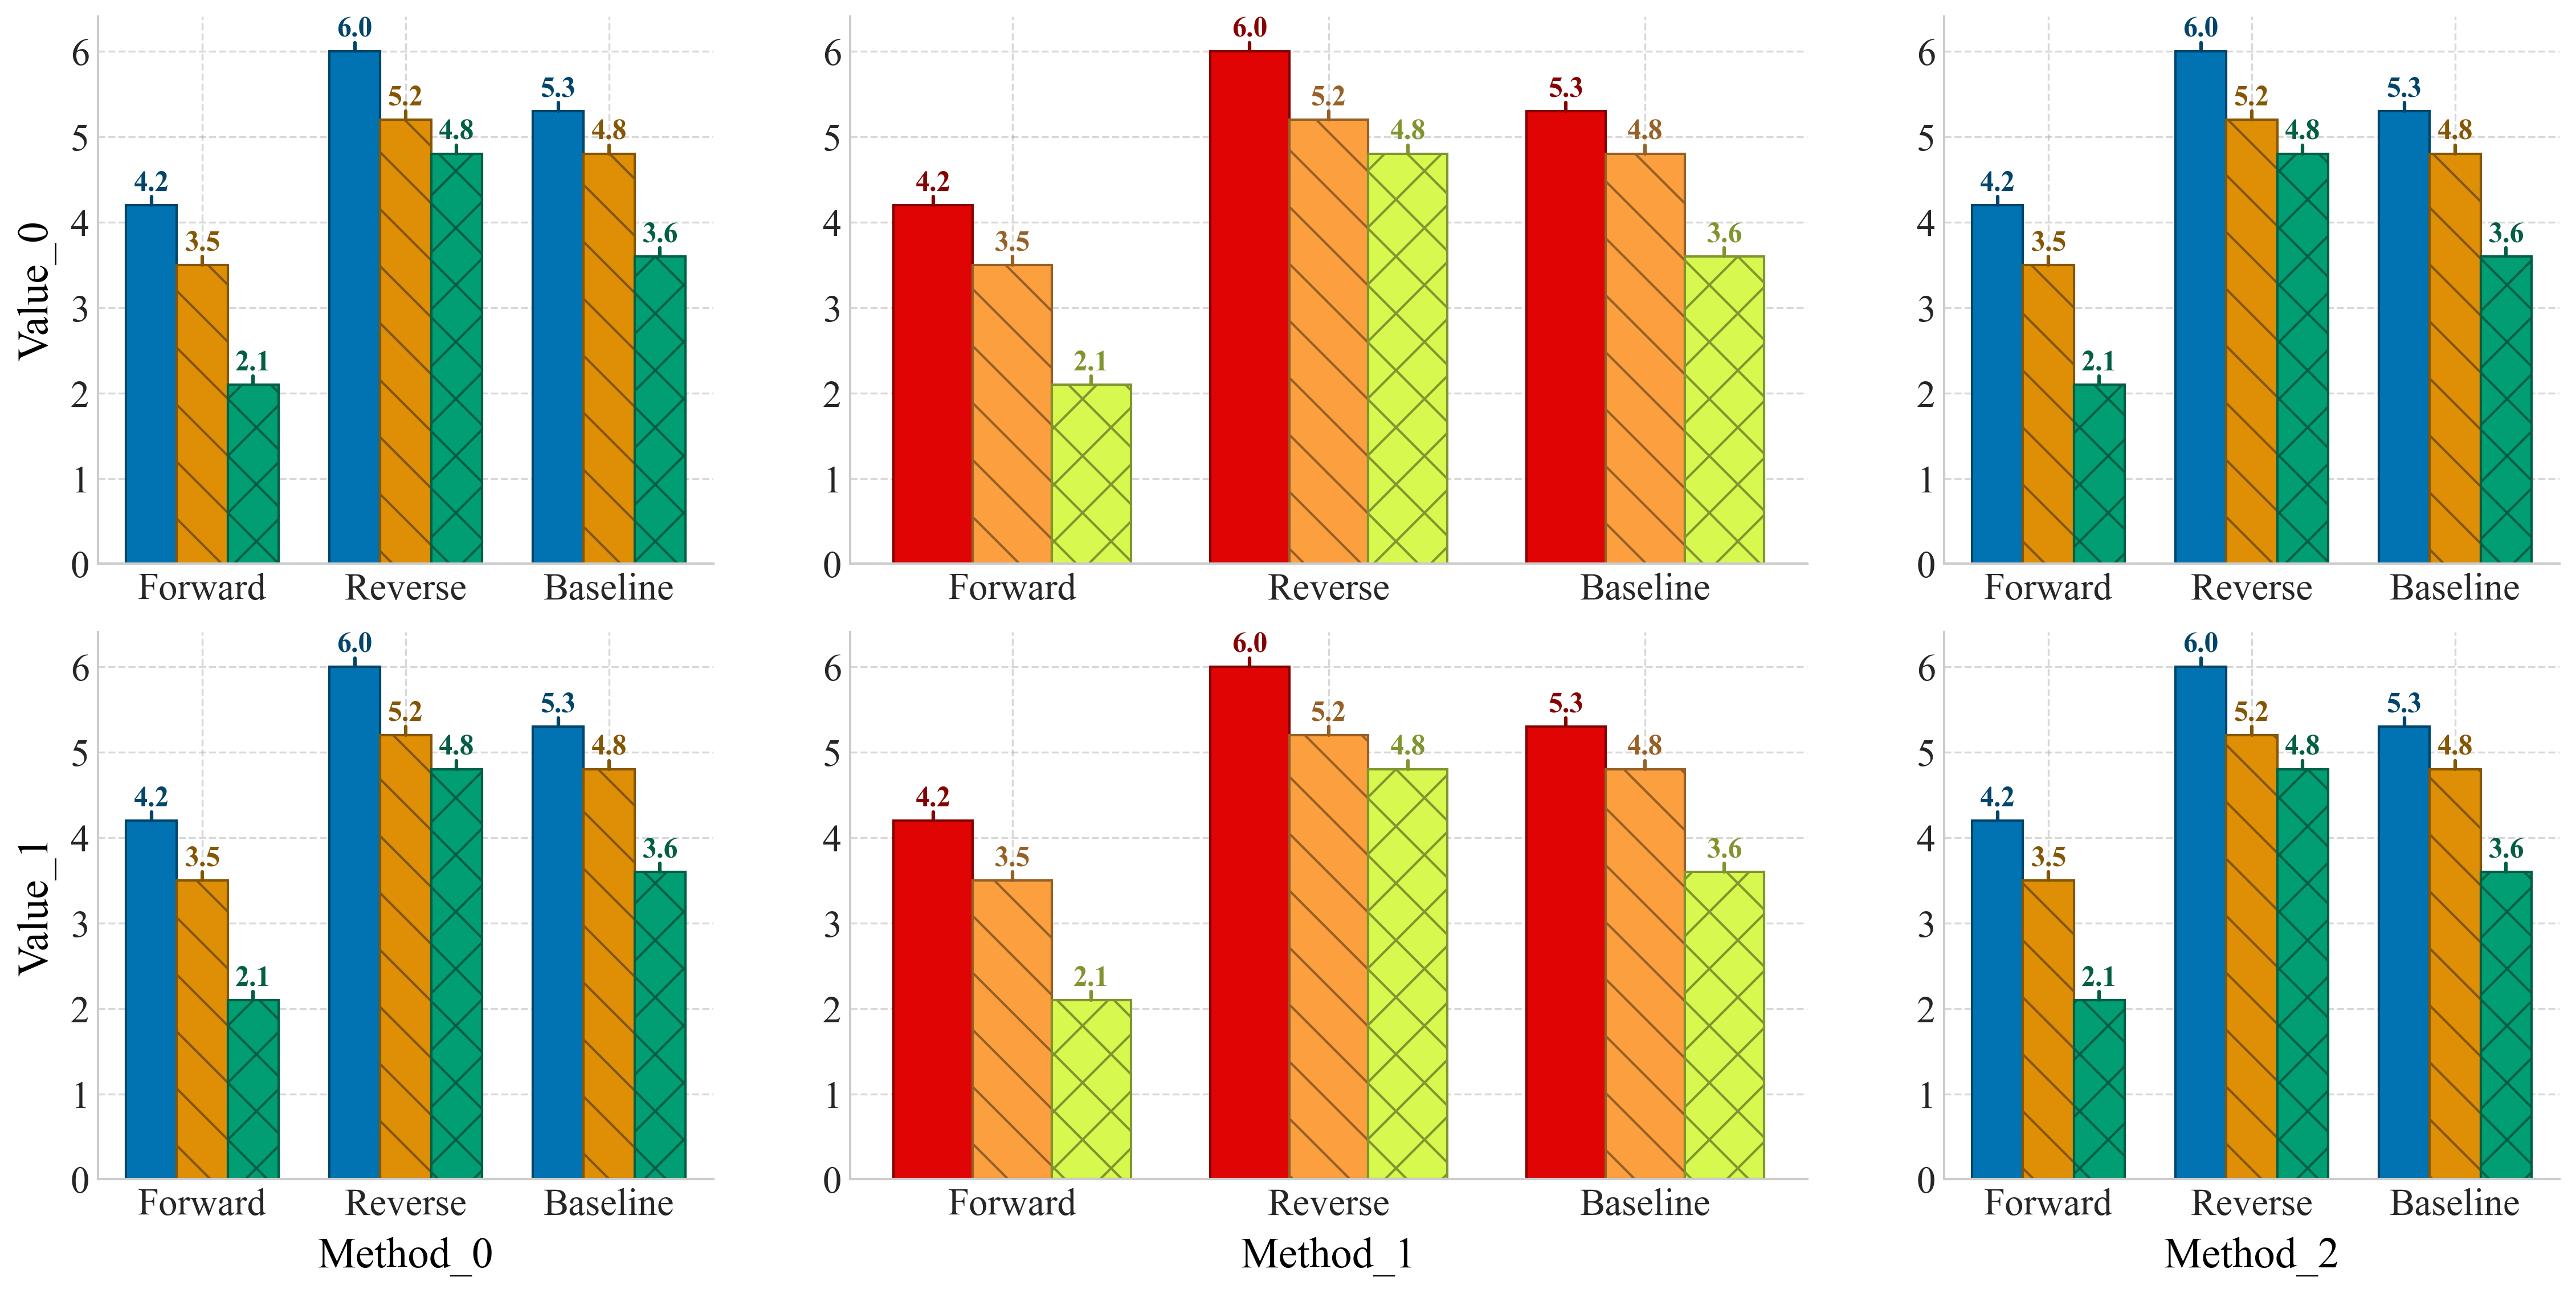

In [2]:
from paperviz import layout
from paperviz.layouts import render_layout, PlotBlock
import matplotlib.pyplot as plt

# In this function, you define which plot to give to which grid index
n_rows, n_cols = 2, 3
def plot_fn(row_idx, col_idx):
    xlabel = ylabel = None
    fixed_width = None
    if col_idx == 1:
        fixed_width = 0.35
    if row_idx == n_rows - 1:
        xlabel = f"Method_{col_idx}"
    if col_idx == 0:
        ylabel = f"Value_{row_idx}"


    return PlotBlock("general_bar_plot",
                     fixed_width=fixed_width,
                     kwargs={
                         "data_dict": data_dict,
                         "style_map": style_map,
                         "xlabel": xlabel,
                         "ylabel": ylabel,
                         "color_map": None if col_idx != 1 else other_color_map,
                         "legend_loc": None}
                     )

# Note: If you want to customize like adding a Label or LegendBlock, you can do so by modifying the `grid_layout` that is returned here
grid_layout = layout("grid_stack", n_rows=2, n_cols=3, plot_fn=plot_fn)

fig = render_layout(grid_layout, figsize=(16, 8), margins=(0.05, 0.1, 0.05, 0.05))
plt.show()

## Future Layouts
We plan to add more base layouts, so, if you have suggestions, start a [discussion](https://github.com/lars-quaedvlieg/paperviz/discussions) on GitHub! 🚀